## Influence of Lemmatization and Stemming in the Word Frequency Text Summarization 

In [258]:
import string
import re
import nltk
import heapq
import spacy

In [259]:
#Open and read the article
f = open("/home/andre/Desktop/DataScience/P_sentimento/items_d.txt", "r", encoding="utf8")
original_text = f.read()

In [260]:
original_text = re.sub(r'\s+', ' ', original_text)  

nltk.download('punkt')  
nltk.download('stopwords') 

stopwords = nltk.corpus.stopwords.words('portuguese')  

[nltk_data] Downloading package punkt to /home/andre/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/andre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [261]:
def preprocessing(text):
    rendered_text = text.lower()   
   
    # remove the stop words
    tokens = []
    for token in nltk.word_tokenize(rendered_text):  
        tokens.append(token)

    tokens = [word for word in tokens if word not in stopwords and word not in string.punctuation]  
    rendered_text = ' '.join([str(element) for element in tokens if not element.isdigit()])

    return rendered_text

In [262]:
pln = spacy.load('pt_core_news_sm') 

def preprocessing_lemmatization(text):
    rendered_text = text.lower()   
        
    document = pln(rendered_text)
    tokens = []
    for token in document:
        tokens.append(token.lemma_)

    tokens = [word for word in tokens if word not in stopwords and word not in string.punctuation]  
    rendered_text = ' '.join([str(element) for element in tokens if not element.isdigit()])

    return rendered_text

In [263]:
from nltk.stem import SnowballStemmer 

def preprocessing_stemming(text):
    rendered_text = text.lower()   
    tokens1 = nltk.word_tokenize(rendered_text, language="portuguese")
           
    stemmer2 = SnowballStemmer("portuguese")
    document =  [stemmer2.stem(word) for word in tokens1] 
    tokens = []
    for token in document:
        tokens.append(token)

    tokens = [word for word in tokens if word not in stopwords and word not in string.punctuation]  
    rendered_text = ' '.join([str(element) for element in tokens if not element.isdigit()])

    return rendered_text

In [264]:
def summarization(text, sentence_amount, methods):
  original_text = text
  if methods == 0:
      rendered_text = preprocessing(original_text)
  elif methods == 1:
      rendered_text = preprocessing_lemmatization(original_text)
  elif methods == 2:
      rendered_text = preprocessing_stemming(original_text)
  else:
      print('The only options for methods are: 0 (no method), 1 (lemmatization) or 2 (stemming)')

  word_frequency = nltk.FreqDist(nltk.word_tokenize(rendered_text))
  maximum_frequency = max(word_frequency.values())
  for word in word_frequency.keys():
    word_frequency[word] = (word_frequency[word] / maximum_frequency)
  list_sentences = nltk.sent_tokenize(original_text)
  
  note_sentences = {}
  for sentence in list_sentences:
    for word in nltk.word_tokenize(sentence):
      if word in word_frequency.keys():
        if sentence not in note_sentences.keys():
          note_sentences[sentence] = word_frequency[word]
        else:
          note_sentences[sentence] += word_frequency[word]

  best_sentences = heapq.nlargest(sentence_amount, note_sentences, key=note_sentences.get)

  return list_sentences, best_sentences, word_frequency, note_sentences

In [275]:
list_sentences, best_sentences, _, _ = summarization(original_text, 2, 0)
list_sentences1, best_sentences1, _, _ = summarization(original_text, 2, 1)
list_sentences2, best_sentences2, _, _ = summarization(original_text, 2, 2)

In [276]:
def abstract_creator(best_sentences):
    abstract = ' '.join(best_sentences)
    return abstract

In [277]:
abstract_normal = abstract_creator(best_sentences)
abstract_lemmatization = abstract_creator(best_sentences1)
abstract_stemming = abstract_creator(best_sentences2)

## Summary performed without method

In [278]:
abstract_normal

'Considerando os cenários avaliados, o balanço de riscos e o amplo conjunto de informações disponíveis, o Copom decidiu, por unanimidade, elevar a taxa básica de juros em 0,50 ponto percentual, para 13,75% a.a. O Comitê entende que essa decisão reflete a incerteza ao redor de seus cenários e um balanço de riscos com variância ainda maior do que a usual para a inflação prospectiva, e é compatível com a estratégia de convergência da inflação para o redor da meta ao longo do horizonte relevante, que inclui o ano de 2023 e, em grau menor, o de 2024. Nota ainda que a incerteza da atual conjuntura, tanto doméstica quanto global, aliada ao estágio avançado do ciclo de ajuste e seus impactos acumulados ainda por serem observados, demanda cautela adicional em sua atuação.'

## Summary performed with lemmatization of the text

In [279]:
abstract_lemmatization

"Considerando os cenários avaliados, o balanço de riscos e o amplo conjunto de informações disponíveis, o Copom decidiu, por unanimidade, elevar a taxa básica de juros em 0,50 ponto percentual, para 13,75% a.a. O Comitê entende que essa decisão reflete a incerteza ao redor de seus cenários e um balanço de riscos com variância ainda maior do que a usual para a inflação prospectiva, e é compatível com a estratégia de convergência da inflação para o redor da meta ao longo do horizonte relevante, que inclui o ano de 2023 e, em grau menor, o de 2024. Votaram por essa decisão os seguintes membros do Comitê: Roberto de Oliveira Campos Neto (presidente), Bruno Serra Fernandes, Carolina de Assis Barros, Diogo Abry Guillen, Fernanda Magalhães Rumenos Guardado, Maurício Costa de Moura, Otávio Ribeiro Damaso, Paulo Sérgio Neves de Souza e Renato Dias de Brito Gomes.']"

## Summary performed with stemming of the text

In [280]:
abstract_stemming

'Considerando os cenários avaliados, o balanço de riscos e o amplo conjunto de informações disponíveis, o Copom decidiu, por unanimidade, elevar a taxa básica de juros em 0,50 ponto percentual, para 13,75% a.a. O Comitê entende que essa decisão reflete a incerteza ao redor de seus cenários e um balanço de riscos com variância ainda maior do que a usual para a inflação prospectiva, e é compatível com a estratégia de convergência da inflação para o redor da meta ao longo do horizonte relevante, que inclui o ano de 2023 e, em grau menor, o de 2024. O Comitê avaliará a necessidade de um ajuste residual, de menor magnitude, em sua próxima reunião.'

In [281]:
print(len(abstract_normal), len(abstract_lemmatization), len(abstract_stemming))

772 867 649


## Metrics of the summaries created using different methods

In [272]:
import evaluate 

In [304]:
def rouge_metric(summary):
    rouge = evaluate.load('rouge')  
    # Summary performed by human. 
    references = ["""O Copom decidiu, por unanimidade, elevar a taxa básica de juros em 0,50 ponto percentual, para 13,75% a.a. Sem prejuízo de seu objetivo fundamental de assegurar a estabilidade de preços, essa decisão também implica
    suavização das flutuações do nível de atividade econômica e fomento do pleno emprego.  O Comitê avaliará a necessidade de um ajuste residual, de menor magnitude, em
    sua próxima reunião. O Copom enfatiza que seguirá vigilante e que os passos futuros
    da política monetária poderão ser ajustados para assegurar a convergência da inflação
    para suas metas."""]
    predictions = [summary]              
    results = rouge.compute(predictions=predictions, references=references)
    print('Number of words from summary elaborated by humans: ', len(human_summary))
    print(results)
    return results

In [305]:
normal_summary = rouge_metric(abstract_normal)

Number of words from summary elaborated by humans:  567
{'rouge1': 0.47876447876447875, 'rouge2': 0.23346303501945526, 'rougeL': 0.3011583011583011, 'rougeLsum': 0.4015444015444015}


In [309]:
lemmatization_summary = rouge_metric(abstract_lemmatization)

Number of words from summary elaborated by humans:  567
{'rouge1': 0.44688644688644685, 'rouge2': 0.2140221402214022, 'rougeL': 0.2783882783882784, 'rougeLsum': 0.3956043956043956}


In [310]:
stemming_summary = rouge_metric(abstract_stemming)

Number of words from summary elaborated by humans:  567
{'rouge1': 0.5774058577405857, 'rouge2': 0.37974683544303794, 'rougeL': 0.41004184100418406, 'rougeLsum': 0.502092050209205}


In [306]:
import matplotlib.pyplot as plt 

In [311]:
def bar_graph(summary):
    y = list(summary.values())
    x = list(summary.keys())
    print(y)
    print(x)
    plt.bar(x,y, color="blue")


[0.47876447876447875, 0.23346303501945526, 0.3011583011583011, 0.4015444015444015]
['rouge1', 'rouge2', 'rougeL', 'rougeLsum']


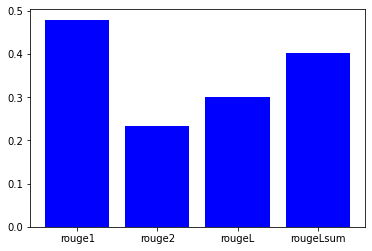

In [312]:
bar_graph(normal_summary)

[0.44688644688644685, 0.2140221402214022, 0.2783882783882784, 0.3956043956043956]
['rouge1', 'rouge2', 'rougeL', 'rougeLsum']


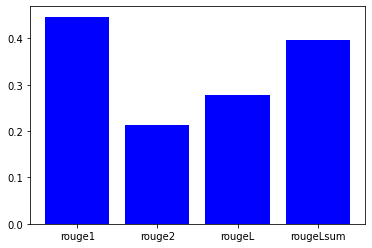

In [313]:
bar_graph(lemmatization_summary)

[0.5774058577405857, 0.37974683544303794, 0.41004184100418406, 0.502092050209205]
['rouge1', 'rouge2', 'rougeL', 'rougeLsum']


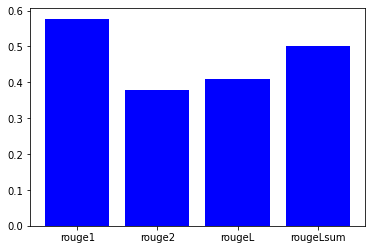

In [314]:
bar_graph(stemming_summary)

## Conclusion

In [315]:
import pandas as pd

In [329]:
df = pd.DataFrame(data=[normal_summary, lemmatization_summary, stemming_summary], index=['normal_summary', 'lemmatization_summary', 'stemming_summary']) 

In [331]:
df

,rouge1,rouge2,rougeL,rougeLsum
normal_summary,0.478764,0.233463,0.301158,0.401544
lemmatization_summary,0.446886,0.214022,0.278388,0.395604
stemming_summary,0.577406,0.379747,0.410042,0.502092


In [335]:
df.index  # index shows the name of the lines of a dataframe

Index(['normal_summary', 'lemmatization_summary', 'stemming_summary'], dtype='object')

In [343]:
print('The best method found for summarization using rouge1 metric was: ', max(df['rouge1'].index))
print('The best method found for summarization using rouge2 metric was: ', max(df['rouge2'].index))
print('The best method found for summarization using rougeL metric was: ', max(df['rougeL'].index))
print('The best method found for summarization using rougeLsum metric was: ', max(df['rougeLsum'].index))

The best method found for summarization using rouge1 metric was:  stemming_summary
The best method found for summarization using rouge2 metric was:  stemming_summary
The best method found for summarization using rougeL metric was:  stemming_summary
The best method found for summarization using rougeLsum metric was:  stemming_summary
